# LETS GROW MORE

TASK -4

Name :SHRI HARSINIMIRA G

Level-Advanced
    
Develop a Neural Network That can read Handwriting

In [29]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.utils import np_utils

In [30]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

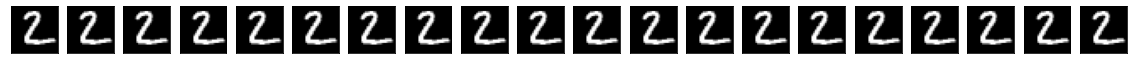

In [37]:
import matplotlib.pyplot as plt
n=20
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[1].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()
    

In [32]:
print("Previous x_train shape: () \nPrevious y_train shape:{}".format(x_train.shape,y_train.shape))
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255
classes = 10
y_train = np_utils.to_categorical(y_train,classes)
y_test = np_utils.to_categorical(y_test,classes)
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape,y_train.shape))

Previous x_train shape: () 
Previous y_train shape:(60000, 28, 28)
New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)


In [33]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
epochs = 2

In [34]:
model = Sequential()
model.add(Dense(hidden1, input_dim=input_size,activation='relu'))

model.add(Dense(hidden2,activation='relu'))
model.add(Dense(classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
metrics=['accuracy'],optimizer='sgd')
model.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 400)               314000    
                                                                 
 dense_11 (Dense)            (None, 20)                8020      
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=100,verbose=2)

Epoch 1/100
300/300 - 2s - loss: 1.5057 - accuracy: 0.6069 - 2s/epoch - 7ms/step
Epoch 2/100
300/300 - 2s - loss: 0.6655 - accuracy: 0.8430 - 2s/epoch - 6ms/step
Epoch 3/100
300/300 - 2s - loss: 0.4766 - accuracy: 0.8783 - 2s/epoch - 6ms/step
Epoch 4/100
300/300 - 2s - loss: 0.4024 - accuracy: 0.8926 - 2s/epoch - 6ms/step
Epoch 5/100
300/300 - 2s - loss: 0.3620 - accuracy: 0.9009 - 2s/epoch - 7ms/step
Epoch 6/100
300/300 - 2s - loss: 0.3352 - accuracy: 0.9072 - 2s/epoch - 7ms/step
Epoch 7/100
300/300 - 2s - loss: 0.3154 - accuracy: 0.9122 - 2s/epoch - 7ms/step
Epoch 8/100
300/300 - 2s - loss: 0.2994 - accuracy: 0.9160 - 2s/epoch - 7ms/step
Epoch 9/100
300/300 - 2s - loss: 0.2862 - accuracy: 0.9194 - 2s/epoch - 7ms/step
Epoch 10/100
300/300 - 2s - loss: 0.2745 - accuracy: 0.9227 - 2s/epoch - 6ms/step
Epoch 11/100
300/300 - 2s - loss: 0.2642 - accuracy: 0.9255 - 2s/epoch - 7ms/step
Epoch 12/100
300/300 - 2s - loss: 0.2549 - accuracy: 0.9278 - 2s/epoch - 7ms/step
Epoch 13/100
300/300 - 2s

# TESTING THE MODEL

313/313 [==============================] - 1s 3ms/step - loss: 0.0805 - accuracy: 0.9756

test accuracy: 0.975600004196167
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


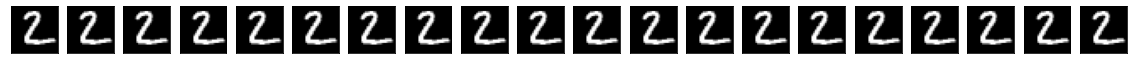

In [39]:
score = model.evaluate(x_test,y_test,verbose=1)
print('\n''test accuracy:',score[1])
mask = range(0,20)
x_valid = x_test[mask]
predict_y=model.predict(x_valid)
classes_y=np.argmax(predict_y,axis=1)
print(classes_y)

#display oridinal
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2, n, i+1)
    plt.imshow(x_test[1].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()